In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/train_data.txt',sep=':::',header=None)
df.columns=["ID","Title","Genre","Description"]
df

<ipython-input-2-b56b2358ff02>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv('/content/train_data.txt',sep=':::',header=None)


,ID,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...,...
54209,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54210,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54212,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [ ]:
df.head()

,ID,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [ ]:
df.tail()

,ID,Title,Genre,Description
54209,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54210,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54212,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...
54213,54214,Nature's Fury: Storm of the Century (2006),history,"On Labor Day Weekend, 1935, the most intense ..."


In [ ]:
df.describe()

,ID
count,54214.000000
mean,27107.500000
std,15650.378084
min,1.000000
25%,13554.250000
50%,27107.500000
75%,40660.750000
max,54214.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  int64 
 1   Title        54214 non-null  object
 2   Genre        54214 non-null  object
 3   Description  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [ ]:
df.isna().sum()

ID             0
Title          0
Genre          0
Description    0
dtype: int64

In [ ]:
df.dtypes

ID              int64
Title          object
Genre          object
Description    object
dtype: object

In [ ]:
df.shape

(54214, 4)

In [ ]:
x = df.drop(['Genre'], axis=1)
x

,ID,Title,Description
0,1,Oscar et la dame rose (2009),Listening in to a conversation between his do...
1,2,Cupid (1997),A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",As the bus empties the students for their fie...
3,4,The Secret Sin (1915),To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),The film's title refers not only to the un-re...
...,...,...,...
54209,54210,"""Bonino"" (1953)",This short-lived NBC live sitcom centered on ...
54210,54211,Dead Girls Don't Cry (????),The NEXT Generation of EXPLOITATION. The sist...
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),"Ze bestaan echt, is a stand-up comedy about g..."
54212,54213,Make Your Own Bed (1944),Walter and Vivian live in the country and hav...


In [ ]:
y=df['Genre'].values
y

array([' drama ', ' thriller ', ' adult ', ..., ' documentary ',
       ' comedy ', ' history '], dtype=object)

In [ ]:
df['Genre'].value_counts()

Genre
 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Genre'>

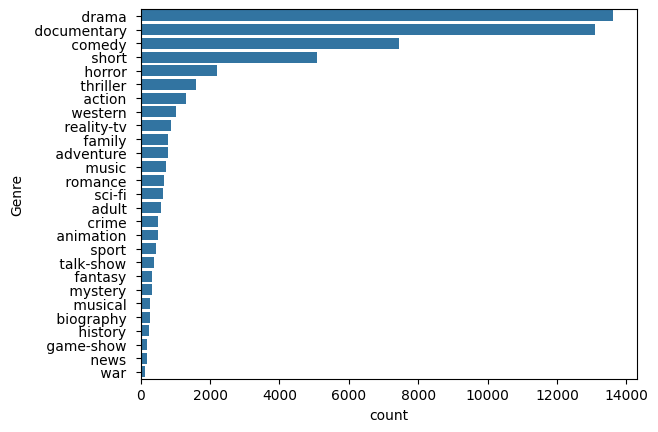

In [ ]:
sns.countplot(y='Genre',data=df,order=df['Genre'].value_counts().index)

In [ ]:
messages=df.copy()
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

ps = PorterStemmer()
stop_words = set(stopwords.words('english'))
lst = []

for i in range(len(messages)):
    review = re.sub('[^a-zA-Z0-9]+', ' ', messages['Description'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in stop_words]
    review = ' '.join(review)
    lst.append(review)

In [ ]:
lst[3]

'help unemploy father make end meet edith twin sister grace work seamstress invalid grace fall prey temptat chinatown opium becom addict condit worsen misguid physician prescrib morphin eas pain father strike oil famili enjoy new prosper sister meet elig jack herron fellow oil prospector grace shock jack fall love edith jealousi grace tell jack edith drug problem hint sister soon need morphin grace arrang dinner chinatown coupl sister jack danc grace slip away opium den edith follow end wrong den arrest ensu drug raid bail jail edith take angri jack search grace stumbl across half consciou bodi lie street truth sister reveal send grace sanitarium countri jack edith marri'

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=5000)
train_data=tfidf_v.fit_transform(lst).toarray()

In [ ]:
train_data.shape

(54214, 5000)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_data,y,test_size=0.30,random_state=42)
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y_train

array([' crime ', ' comedy ', ' drama ', ..., ' drama ', ' drama ',
       ' documentary '], dtype=object)

In [ ]:
y_test

array([' comedy ', ' short ', ' comedy ', ..., ' documentary ', ' drama ',
       ' drama '], dtype=object)

In [ ]:
#model creation
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
model=MultinomialNB()

In [ ]:
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([' drama ', ' drama ', ' documentary ', ..., ' documentary ',
       ' drama ', ' documentary '], dtype='<U13')

In [ ]:
accuracy =accuracy_score(y_test,y_pred)
mat=confusion_matrix(y_test,y_pred)
print("Confusion matrix:",mat)

Confusion matrix: [[  22    0    0    0    0   21    0   84  254    0    0    0    0    7
     0    0    0    0    0    0    1    0    4    0    4    0    1]
 [   0   10   15    0    0   48    0   14   66    0    0    0    0    0
     0    0    0    0    0    0    0    3    0    0    0    0    0]
 [   1    4   17    0    0   25    0   65   99    0    0    0    0    6
     0    0    0    0    0    0    1    2    0    0    0    0    0]
 [   0    0    0    0    0   29    0   55   59    0    0    0    0    0
     0    0    0    0    0    0    0    3    0    0    0    0    0]
 [   0    0    0    0    0    8    0   65   15    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   2    0    1    0    0  946    0  238 1013    0    0    0    0    5
     0    0    0    0    0    0    0   10    0    0    0    0    0]
 [   2    0    0    0    0   18    0   14  126    0    0    0    0    1
     0    0    0    0    0    0    0    1    0    0    1    0    1]
 [

In [ ]:
print("Accuracy:",accuracy)
print()
print(classification_report(y_test,y_pred))

Accuracy: 0.5158315401168152

               precision    recall  f1-score   support

      action        0.69      0.06      0.10       398
       adult        0.71      0.06      0.12       156
   adventure        0.50      0.08      0.13       220
   animation        0.00      0.00      0.00       146
   biography        0.00      0.00      0.00        88
      comedy        0.52      0.43      0.47      2215
       crime        0.00      0.00      0.00       164
 documentary        0.56      0.88      0.68      3942
       drama        0.45      0.83      0.59      4076
      family        0.00      0.00      0.00       218
     fantasy        0.00      0.00      0.00       103
   game-show        1.00      0.04      0.07        55
     history        0.00      0.00      0.00        73
      horror        0.77      0.34      0.47       626
       music        0.88      0.06      0.12       217
     musical        0.00      0.00      0.00        77
     mystery        0.00      0.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
